# Predictive Maintenance

In [26]:
import numpy as np
import pandas as pd

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [27]:
"""
AUTHOR'S WORDS:


[Machine Predictive Maintenance Classification Dataset]

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic 
dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns


UID                     : unique identifier ranging from 1 to 10000

productID               : consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants 
                          and a variant-specific serial number

air temperature [K]     : generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K] : generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]  : calculated from powepower of 2860 W, overlaid with a normally distributed noise

torque [Nm]             : torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.

tool wear [min]         : The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
                          'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the 
                          following failure modes are true.


Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.

Target       : Failure or Not
Failure Type : Type of Failure
"""

#MIMO??

"\nAUTHOR'S WORDS:\n\n\n[Machine Predictive Maintenance Classification Dataset]\n\nSince real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic \ndataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.\n\nThe dataset consists of 10 000 data points stored as rows with 14 features in columns\n\n\nUID                     : unique identifier ranging from 1 to 10000\n\nproductID               : consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants \n                          and a variant-specific serial number\n\nair temperature [K]     : generated using a random walk process later normalized to a standard deviation of 2 K around 300 K\n\nprocess temperature [K] : generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

# Importing Dataset

In [28]:
# Dataset Source: https://www.kaggle.com/shivamb/machine-predictive-maintenance-classification

df = pd.read_csv("./predictive_maintenance.csv")

Let's see how the data looks like

In [29]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,78912314860,789123,298.1,308.6,1551,42.8,0,0,0
1,2,65432147181,654321,298.2,308.7,1408,46.3,3,0,0
2,3,65432147182,654321,298.1,308.5,1498,49.4,5,0,0
3,4,65432147183,654321,298.2,308.6,1433,39.5,7,0,0
4,5,65432147184,654321,298.2,308.7,1408,40.0,9,0,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  int64  
 2   Type                     10000 non-null  int64  
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


Apparently there are no missing data. Next we will perform Exploratory Data Analysis. But before that, I will segregate numerical features and categorical features to ease the process

In [31]:
df_numeric = df.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
df_cat    = df.loc[:,['Type']]

# Exploratory Data Analysis - Numerical Features

In [32]:
df.describe()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,6.414758e+10,641475.399900,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.101800
std,2886.89568,1.831684e+10,183168.441688,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.616178
min,1.00000,1.234563e+10,123456.000000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000
25%,2500.75000,6.543215e+10,654321.000000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000
50%,5000.50000,6.543215e+10,654321.000000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000
75%,7500.25000,7.891232e+10,789123.000000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000
max,10000.00000,7.891232e+10,789123.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,5.000000


Let's see the histogram for numerical features. From these chart, we will observe how the value is distributed and check whether if there are any anomalies

/tmp/ipykernel_28814/3318490625.py:7: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>, <Axes: >]],
      dtype=object)

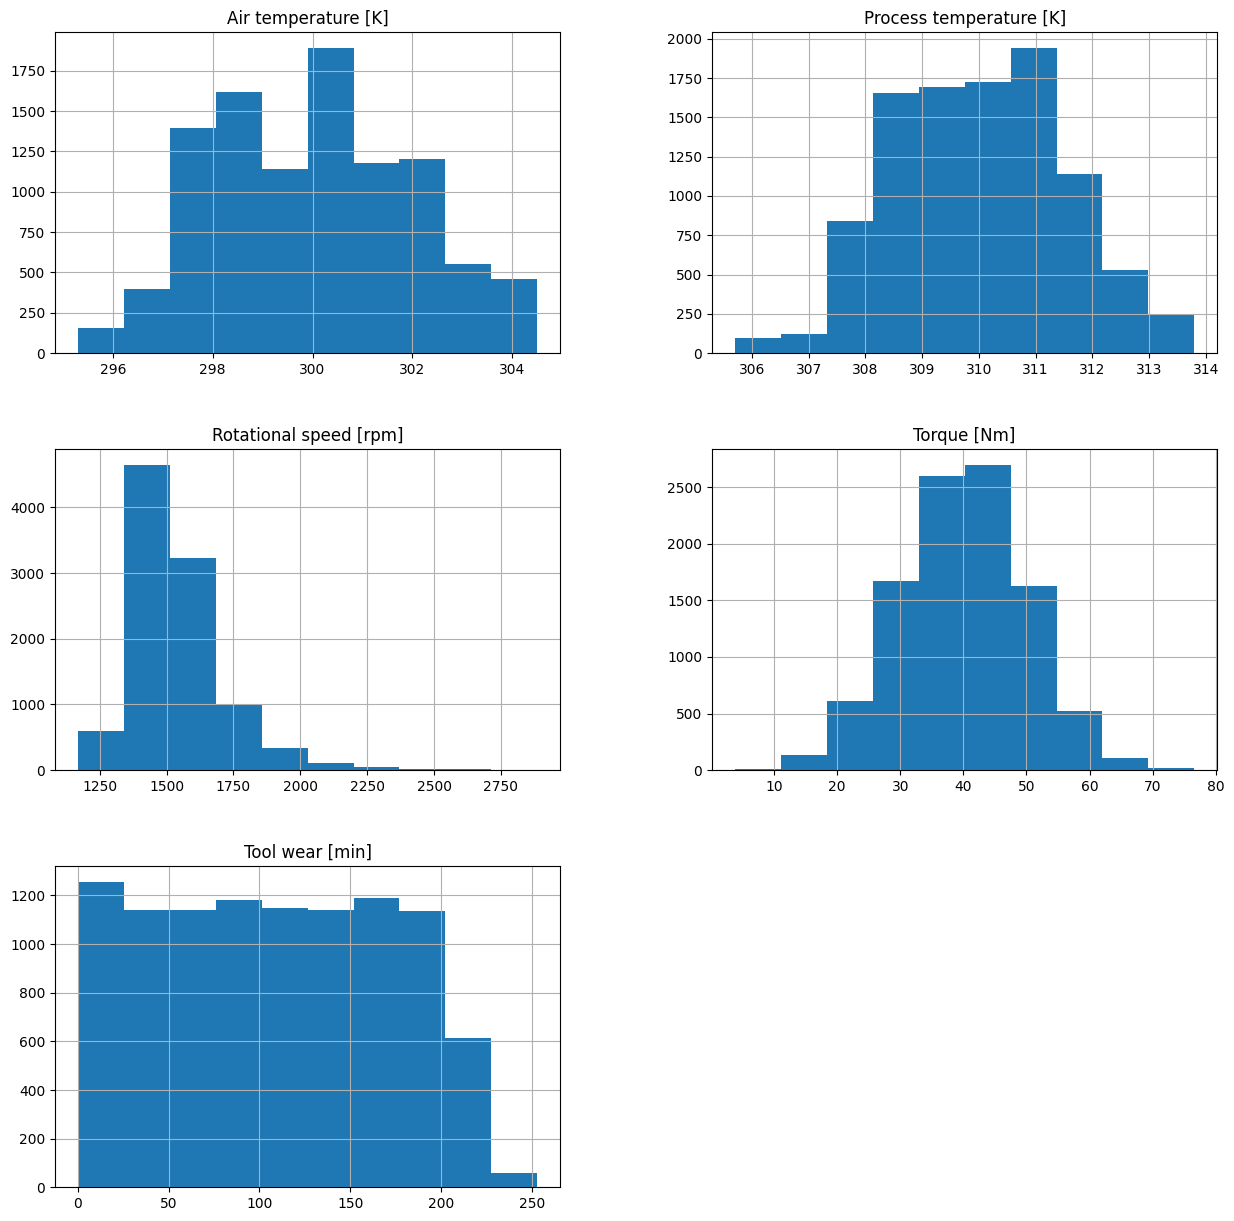

In [33]:
import matplotlib.pyplot as plt
import plotly.express as px

fig = plt.figure(figsize = (15,15))
ax  = fig.gca()

df_numeric.loc[:,['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']].hist(ax = ax)

Apparently from my observation, there are no abnormalities on the pattern. Next, we will perform skewness analysis to see whether the numerical features are severely skewed or not.

- If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.
- If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed.
- If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed

([Source](www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/))

In [34]:
df_numeric.skew()

Air temperature [K]        0.114274
Process temperature [K]    0.015027
Rotational speed [rpm]     1.993171
Torque [Nm]               -0.009517
Tool wear [min]            0.027292
dtype: float64

# Exploratory Data Analysis - Categorical Features

A pie chart below shows the distribution of the Failure Types

In [35]:
# Observe distrubution of failures
import plotly.graph_objects as go
import plotly.express as px

fig = px.pie(df,
             title  = 'Failure Types',
             values = 'UDI',
             names  = 'Failure Type')
fig.show()

As expected, the dataset is highly imbalanced where the machine failure consist only 3.2% of the whole dataset. There are few methods to deal with it such as downsampling the majority class, SMOTEC, ADASYN and etc. But let's leave it as it is

Next, Box plot are generated to observe the relationship between categorical features with the Target and Failure Type

In [36]:
"""
[BOX PLOT FOR NUMERIC FEATURES]
"""

# Air Temperature relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Air Temperature relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Process Tempearture relation with Target/Failure Type
fig = px.box(df,
             y      =  "Process temperature [K]",
             x      =  "Target",
             title  =  "Process Tempearture relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Rotational speed [rpm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Air temperature [K]",
             x      =  "Target",
             title  =  "Rotational speed [rpm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Torque [Nm] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Torque [Nm]",
             x      =  "Target",
             title  =  "Torque [Nm] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

# Tool wear [min] relation with Target/Failure Type
fig = px.box(df,
             y      =  "Tool wear [min]",
             x      =  "Target",
             title  =  "Tool wear [min] relation with Target and Failure Type",
             color  =  "Failure Type",
             width  =  800,
             height =  400)
fig.show()

Apparently it is hard to come up with any conclusion from the box plot. So we will try observing correlation of certain features with Failure Type using pandas Pivot Table

In [37]:
# Correlation with Product ID with Failure
pd.pivot_table(df,
               index   = 'Failure Type', 
               columns = 'Type', 
               values  = 'UDI',
               aggfunc ='count')


Type,123456,654321,789123
Failure Type,,,
0,979,5757,2916
1,5,59,31
2,1,73,4
3,6,25,14
4,4,12,2
5,8,74,30


In [38]:
pd.pivot_table(df,
               index   = 'Target', 
               columns = 'Type', 
               values  = 'UDI',
               aggfunc ='count')

Type,123456,654321,789123
Target,,,
0,982,5765,2914
1,21,235,83


From these pivot table, we can see that machine Type L has higher tendency to fail

To conclude the EDA process, the dataset has no missing data and anomalies to deal with. However, columns like UDI and Product ID may not contribute to the prediction performance. Thus, these two columns will be removed in Data Preprocessing Step

# Data Preprocessing 1: Encoding Categorical Features

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type']         = le.fit_transform(df.loc[:,["Type"]].values)
df['Failure Type'] = le.fit_transform(df.loc[:,["Failure Type"]].values)

/home/satwik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/home/satwik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



# Data Preprocessing 2: Drop Unwanted Features

In [40]:
df = df.drop(["UDI","Product ID"],axis = 1)

# Data Preprocessing 3: Split Training and Testing

In [41]:
from sklearn.model_selection import train_test_split

X  = df.iloc[:, :-2].values
y  = df.loc[:,['Target','Failure Type']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Data Preprocessing 4: Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

scaler       = StandardScaler()
X_train_sc   = scaler.fit_transform(X_train)                # Fit and transform the training set 
X_test_sc    = scaler.transform(X_test)                     # DO NOT CHEAT! Only transform the test set

# Developing Model 1: Support Vector Classification

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier

In [44]:
svc     = SVC()
svc_clf = MultiOutputClassifier(estimator=svc)

svc_clf.fit(X_train, y_train)

print("Multi-Output Training Accuracy: ", svc_clf.score(X_train, y_train)*100, "%")

Multi-Output Training Accuracy:  96.525 %


In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Test the Model 
y_pred_svc   = svc_clf.predict(X_test)

In [46]:
# Performance Metrics
print("Test Accuracy (Target)       : ",accuracy_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Precision (Target)      : ",precision_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Recall (Target)         : ",recall_score(y_test[:,0], y_pred_svc[:,0])*100,"%")
print("Test Accuracy (Failure Type) : ",accuracy_score(y_test[:,1], y_pred_svc[:,1])*100,"%")

Test Accuracy (Target)       :  96.65 %
Test Precision (Target)      :  100.0 %
Test Recall (Target)         :  2.898550724637681 %
Test Accuracy (Failure Type) :  96.5 %


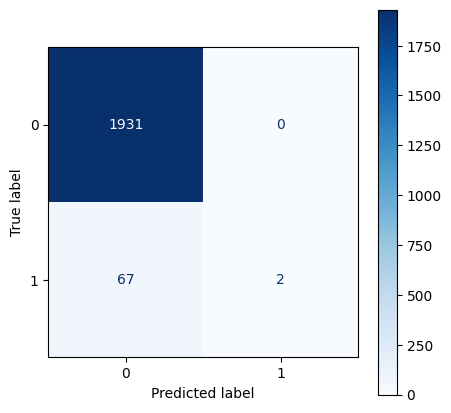

In [47]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


cm             = confusion_matrix(y_test[:,0],
                                  y_pred_svc[:,0])

disp           = ConfusionMatrixDisplay(confusion_matrix=cm,)

fig, ax        = plt.subplots(figsize = (5,5))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

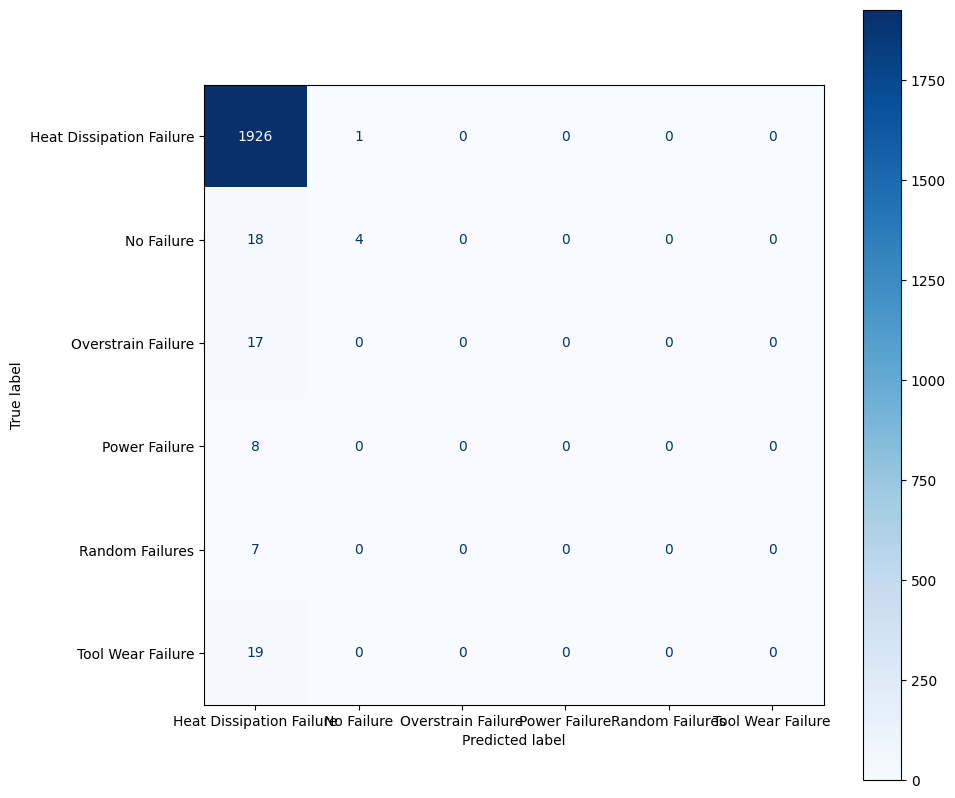

In [48]:
cm      = confusion_matrix(y_test[:,1],
                           y_pred_svc[:,1])

disp    = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels   = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure'])

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

# Developing Model 2: XGBoost

In [49]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: devscripts 2.22.1ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of devscripts or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [50]:
import xgboost as xgb
from xgboost import XGBClassifier

In [51]:
xgb_clf = MultiOutputClassifier(XGBClassifier())
xgb_clf.fit(X_train, y_train)
print("Multi-Output Training Accuracy: ", xgb_clf.score(X_train, y_train)*100, "%")

Multi-Output Training Accuracy:  100.0 %


In [62]:
data = np.array([700,2.493591821,11.79092738,3.178980794,84.14416293,81.6321865]).reshape(1, -1)
response = xgb_clf.predict(data)
response

XGBoostError: [17:53:26] /workspace/src/predictor/cpu_predictor.cc:719: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 6) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x60d4aa) [0x7f221e40d4aa]
  [bt] (1) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x62e114) [0x7f221e42e114]
  [bt] (2) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x62f5ec) [0x7f221e42f5ec]
  [bt] (3) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x45c6fa) [0x7f221e25c6fa]
  [bt] (4) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x4beada) [0x7f221e2beada]
  [bt] (5) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x16d67e) [0x7f221df6d67e]
  [bt] (6) /home/satwik/.local/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x2ab) [0x7f221df6ddcb]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7f228de3ae2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7f228de37493]



In [52]:
# Test the Model 
y_pred_xgb   = xgb_clf.predict(X_test)

In [53]:
# Performance Metrics
print("Test Accuracy (Target)       : ",accuracy_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Precision (Target)      : ",precision_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Recall (Target)         : ",recall_score(y_test[:,0], y_pred_xgb[:,0])*100,"%")
print("Test Accuracy (Failure Type) : ",accuracy_score(y_test[:,1], y_pred_xgb[:,1])*100,"%")

Test Accuracy (Target)       :  98.05 %
Test Precision (Target)      :  78.84615384615384 %
Test Recall (Target)         :  59.42028985507246 %
Test Accuracy (Failure Type) :  98.45 %


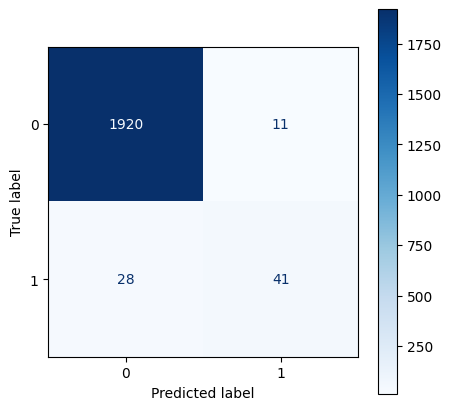

In [54]:
# Confusion Matrix
cm             = confusion_matrix(y_test[:,0],
                                  y_pred_xgb[:,0])

disp           = ConfusionMatrixDisplay(confusion_matrix=cm,)

fig, ax        = plt.subplots(figsize = (5,5))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

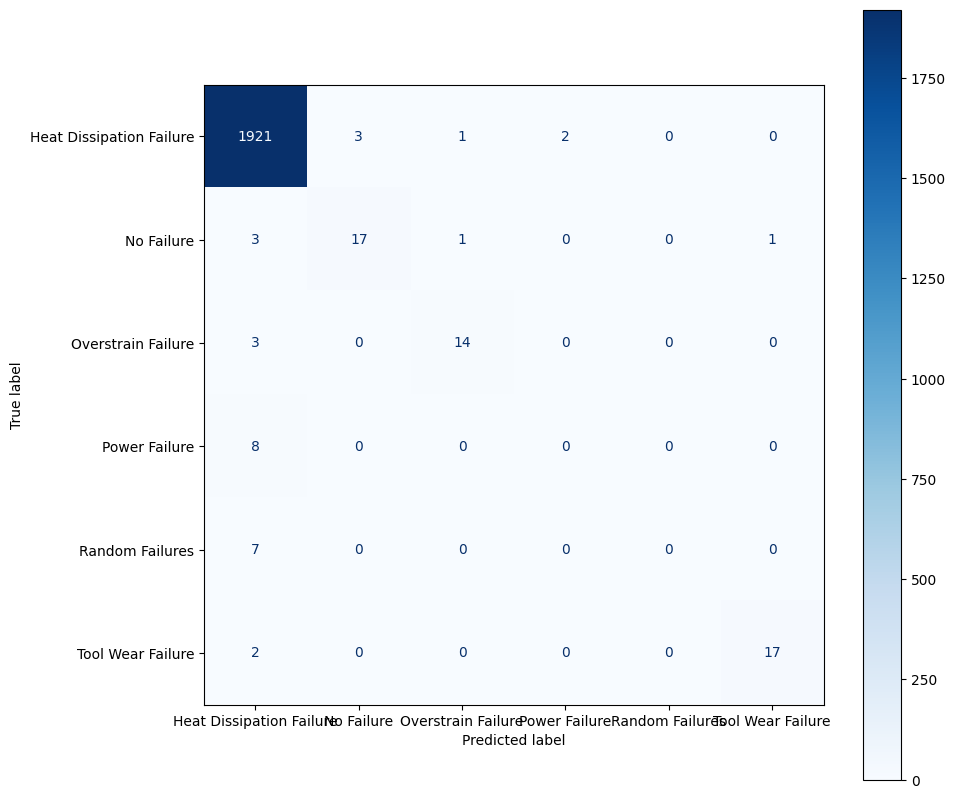

In [55]:
cm      = confusion_matrix(y_test[:,1],
                           y_pred_xgb[:,1])

disp    = ConfusionMatrixDisplay(confusion_matrix = cm,
                                 display_labels   = ['Heat Dissipation Failure','No Failure','Overstrain Failure','Power Failure','Random Failures','Tool Wear Failure'])

fig, ax = plt.subplots(figsize = (10,10))

disp.plot(cmap = plt.cm.Blues,
          ax   = ax)

Let's summarises these model performance



---




Support Vector Classifier:
```
- Training Accuracy            : ❌
- Test Accuracy (Target)       : ❌ 
- Test Precision (Target)      : ✅
- Test Recall (Target)         : ❌
- Test Accuracy (Failure Type) : ❌
```

XGBoost Classifier:
```
- Training Accuracy            : ✅
- Test Accuracy (Target)       : ✅
- Test Precision (Target)      : ❌
- Test Recall (Target)         : ✅
- Test Accuracy (Failure Type) : ✅
```

Looks like XGBoost is an absolute win based on numbers. Based on confusion matrix, SVC is definitely a no-go. It is observed that there are many Failures were misclassified as No Failure
